In [88]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date
import sys
import json

In [89]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams.update({'font.family':'Arial'})

today = date.today()
today = today.strftime("%Y_%m_%d")

if sys.platform == 'darwin':
    basedir = 'Volumes'
else:
    basedir = 'media'
    
pth = f'/{basedir}/HlabShare/appps1_cortical_communication_samb/figure_2/'

In [90]:
#                        Colors

with open(f'/{basedir}/HlabShare/appps1_cortical_communication_samb/geno_colors.json') as json_file:
    geno_clrs = json.load(json_file)
    
with open(f'/{basedir}/HlabShare/appps1_cortical_communication_samb/reg_colors.json') as json_file:
    reg_clrs = json.load(json_file)

dump = 1

In [91]:
savedir = '/Volumes/HlabShare/appps1_cortical_communication_samb/A_preprocessing/plots/'
epochstatscsv = '/Volumes/HlabShare/appps1_cortical_communication_samb/A_preprocessing/epoch_stats_100ms.csv'

In [92]:
epochstats = pd.read_csv(epochstatscsv)
epochstats['sleepoch'] = ['_'.join(i) for i in zip(epochstats['date'].astype(str), epochstats['recepoch'].astype(str), epochstats['epoch'].astype(str))]

In [93]:
epochstats.head()

,animal,region,epoch,epoch_len,nrnind,clustidx,fr_mean,var,pres_ratio,fr_q1,fr_q4,state,date,recepoch,geno,sleepoch
0,CAF69,RSC,0,3320,0,0,10.929217,1.550432,1.0,15.150602,7.097590,active,1228,0_12,WT,1228_0_12_0
1,CAF69,RSC,0,3320,1,1,64.758735,12.359840,1.0,71.450602,52.151807,active,1228,0_12,WT,1228_0_12_0
2,CAF69,RSC,0,3320,2,30,5.009940,0.592107,1.0,5.916867,3.748193,active,1228,0_12,WT,1228_0_12_0
3,CAF69,RSC,0,3320,3,33,7.220181,1.069684,1.0,8.338554,6.280723,active,1228,0_12,WT,1228_0_12_0
4,CAF69,RSC,0,3320,4,34,6.337048,0.738870,1.0,7.886747,4.912048,active,1228,0_12,WT,1228_0_12_0


In [94]:
epochagg = epochstats[['geno','state','sleepoch','animal','epoch_len']].groupby(['geno','state','sleepoch']).max().reset_index()
epochagg = epochagg.sort_values(['geno','state'], ascending = [False,True])

In [95]:
wake_counts = epochagg[epochagg.state=='active'].value_counts(['animal'])
nrem_counts = epochagg[epochagg.state=='nrem'].value_counts(['animal'])
rem_counts = epochagg[epochagg.state=='rem'].value_counts(['animal'])
wake_array = np.vstack([wake_counts.index.get_level_values(0),wake_counts.values]).T
nrem_array = np.vstack([nrem_counts.index.get_level_values(0),nrem_counts.values]).T
rem_array = np.vstack([rem_counts.index.get_level_values(0),rem_counts.values]).T
wake_df = pd.DataFrame(wake_array,columns=['animal','WAKE'])
nrem_df = pd.DataFrame(nrem_array,columns=['animal','NREM'])
rem_df = pd.DataFrame(rem_array,columns=['animal','REM'])
genodic = epochagg[['animal','geno']].drop_duplicates()
epochcounts = pd.merge(wake_df,nrem_df).merge(rem_df).merge(genodic)

In [96]:
epochcounts

,animal,WAKE,NREM,REM,geno
0,CAF71,128,155,10,APP
1,CAF75,124,126,8,APP
2,CAF74,107,135,9,APP
3,CAF77,80,123,46,WT
4,CAF73,47,77,27,APP
5,CAF69,42,131,95,WT
6,CAF82,40,108,68,WT
7,CAF81,15,31,19,WT


In [97]:
epochcounts[epochcounts.geno=='APP']

,animal,WAKE,NREM,REM,geno
0,CAF71,128,155,10,APP
1,CAF75,124,126,8,APP
2,CAF74,107,135,9,APP
4,CAF73,47,77,27,APP


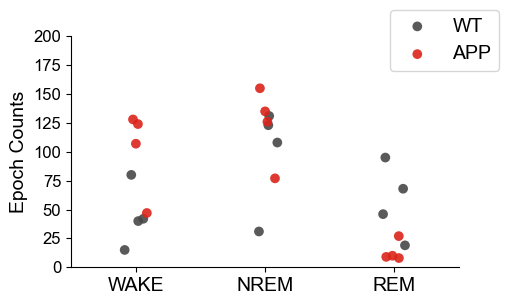

In [100]:
fig = plt.figure(figsize=(5,3))

sns.stripplot(data=epochcounts[epochcounts.geno=='WT'],palette=3*[geno_clrs['WT']],
              label='WT',alpha=0.9,jitter=0.1,s=7)
sns.stripplot(data=epochcounts[epochcounts.geno=='APP'],palette=3*[geno_clrs['APP']],
              label='APP',alpha=0.9,jitter=0.1,s=7)
plt.ylim(0,200)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Epoch Counts',fontsize=14)

sns.despine(right=True)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(),fontsize=14, loc='upper right')

if dump:
    filename = 'epochcounts_by_genotype.pdf'
    plt.savefig(pth+today+filename,dpi=300,bbox_inches='tight')
else:
    pass
plt.show()

In [20]:
wake_lens = epochagg[epochagg.state=='active'][['animal','epoch_len']].groupby('animal').mean()
nrem_lens = epochagg[epochagg.state=='nrem'][['animal','epoch_len']].groupby('animal').mean()
rem_lens =  epochagg[epochagg.state=='rem'][['animal','epoch_len']].groupby('animal').mean()
wake_array = np.vstack([wake_lens.index.get_level_values(0),wake_lens.values.flatten()]).T
nrem_array = np.vstack([nrem_lens.index.get_level_values(0),nrem_lens.values.flatten()]).T
rem_array = np.vstack([rem_lens.index.get_level_values(0),rem_lens.values.flatten()]).T
wake_df = pd.DataFrame(wake_array,columns=['animal','WAKE'])
nrem_df = pd.DataFrame(nrem_array,columns=['animal','NREM'])
rem_df = pd.DataFrame(rem_array,columns=['animal','REM'])
genodic = epochagg[['animal','geno']].drop_duplicates()
epochlens = pd.merge(wake_df,nrem_df).merge(rem_df).merge(genodic)

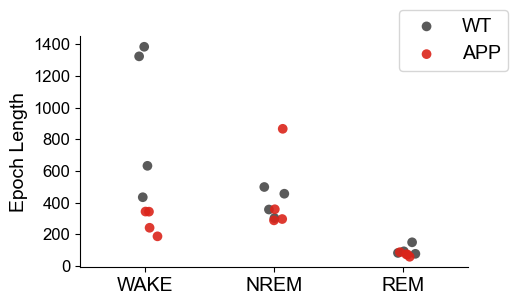

In [101]:
fig = plt.figure(figsize=(5,3))

sns.stripplot(data=epochlens[epochlens.geno=='WT'],palette=3*[geno_clrs['WT']],
              label='WT',alpha=0.9,jitter=0.1,s=7)
sns.stripplot(data=epochlens[epochlens.geno=='APP'],palette=3*[geno_clrs['APP']],
              label='APP',alpha=0.9,jitter=0.1,s=7)

plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Epoch Length',fontsize=14)

sns.despine(right=True)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(),fontsize=14, loc='upper right')
plt.savefig(savedir+'epochlengths_by_genotype.pdf',dpi=300,bbox_inches='tight')

if dump:
    filename = 'epochlengths_by_genotype.pdf'
    plt.savefig(pth+today+filename,dpi=300,bbox_inches='tight')
else:
    pass
plt.show()

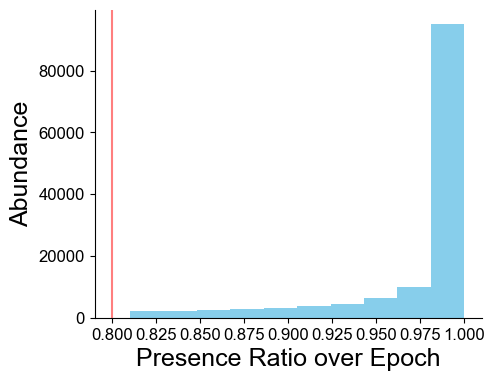

In [81]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.hist(epochstats.pres_ratio,bins=10,color='skyblue')

ax.set_ylabel('Abundance',fontsize = 18)
ax.set_xlabel('Presence Ratio over Epoch',fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.axvline(0.8,color='red',alpha=0.5)

if dump:
    filename = 'presenceratio_total.pdf'
    plt.savefig(pth+today+filename,dpi=300,bbox_inches='tight')
else:
    pass

plt.show()

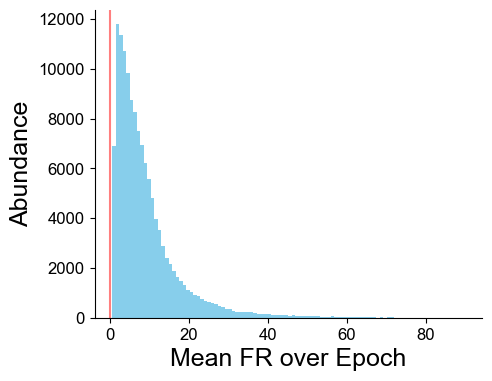

In [87]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.hist(epochstats.fr_mean,bins=100,color='skyblue')

ax.set_ylabel('Abundance',fontsize = 18)
ax.set_xlabel('Mean FR over Epoch',fontsize = 18)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.axvline(0.05,color='red',alpha=0.5)
# plt.savefig(savedir+'meanfr_total_zoomedout.pdf',dpi=300,bbox_inches='tight')

if dump:
    filename = 'meanfr_total_zoomedout.pdf'
    plt.savefig(pth+today+filename,dpi=300,bbox_inches='tight')
else:
    pass

plt.show()